# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

Three observations that can be made with the data below are:
1. The size of a tumor increased depending on the weight of a mouse using the Capomulin regimen.
2. There were slightly more males than females (51% vs 49$).
3. Mice on the Capomulin and Ramicane regimens had significantly lower sized tumors at their final timepoint than did those mice on the Infubinol and Ceftamin regimens. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

# Study data files
mouse_metadata_path = Path("data/Mouse_metadata.csv")
study_results_path = Path("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combined_data_results = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
Combined_data_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
unique = Combined_data_results["Mouse ID"].unique()
len(unique)


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_IDs = Combined_data_results[Combined_data_results.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
Duplicate_IDs["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_ID_No = Duplicate_IDs['Mouse ID'].unique()[0]
Duplicate_IDs_data = Combined_data_results[Combined_data_results['Mouse ID'] == Duplicate_ID_No]
Duplicate_IDs_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_Combined_Data_Results = Combined_data_results[Combined_data_results['Mouse ID'] != 'g989']

Cleaned_Combined_Data_Results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_clean = Cleaned_Combined_Data_Results["Mouse ID"].unique()
len(unique_clean)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_stats = Cleaned_Combined_Data_Results.groupby('Drug Regimen')['Tumor Volume (mm3)']
tumor_mean = tumor_stats.mean()
tumor_median = tumor_stats.median()
tumor_variance = tumor_stats.var()
tumor_std = tumor_stats.std()
tumor_sem = tumor_stats.sem()

tumor_stats_summary = pd.DataFrame({
    'Mean Tumor Volume': tumor_mean,
    'Median Tumor Volume': tumor_median,
    'Tumor Volume Variance': tumor_variance,
    'Tumor Volume Std. Dev.': tumor_std,
    'Tumor Volume Std. Err.': tumor_sem
})

tumor_stats_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats_agg = Cleaned_Combined_Data_Results.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

tumor_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

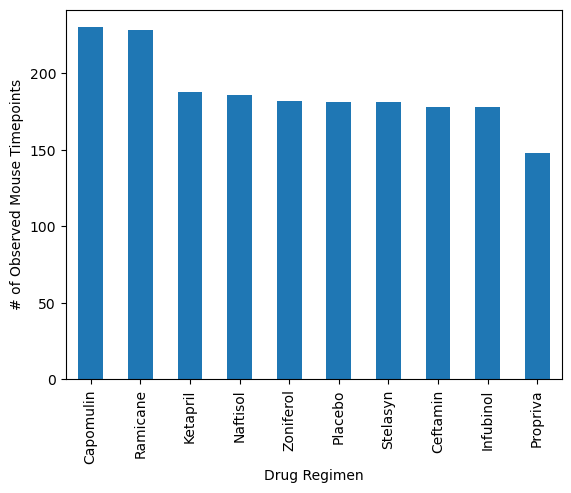

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_and_timepoints = Cleaned_Combined_Data_Results.groupby('Drug Regimen')['Timepoint'].count()
mouse_and_timepoints_sorted = mouse_and_timepoints.sort_values(ascending=False)

mouse_and_timepoints_sorted.plot(kind = "bar",
              xlabel = "Drug Regimen",
              ylabel = "# of Observed Mouse Timepoints")

plt.show

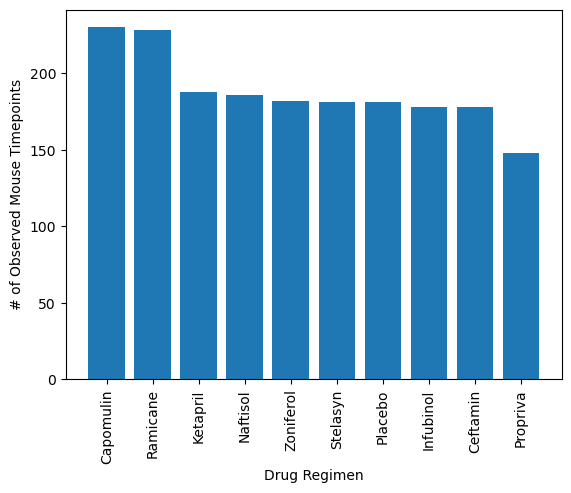

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drug_Count = Cleaned_Combined_Data_Results['Drug Regimen'].value_counts()

plt.figure()
plt.bar(Drug_Count.index, Drug_Count)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 90)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

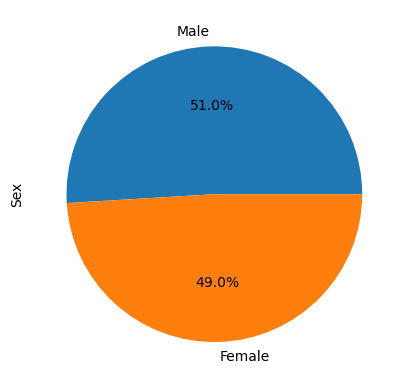

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender = Cleaned_Combined_Data_Results["Sex"].value_counts()
Gender.name = 'Sex'
Gender.plot(kind = 'pie', autopct = '%1.1f%%')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

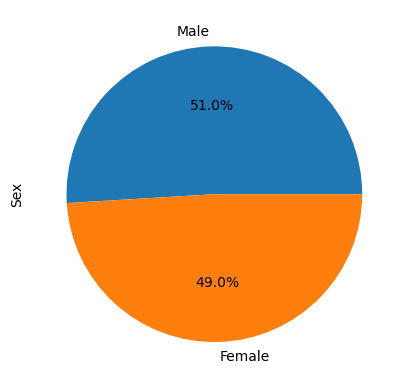

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_pyplot = Cleaned_Combined_Data_Results["Sex"].value_counts()
sex = Gender_pyplot.index
gender_pyplot_count = Gender_pyplot.values
plt.figure()
plt.pie(gender_pyplot_count, labels = sex, autopct = '%1.1f%%')
plt.ylabel("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Four_Regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Four_Regimens_Data = Cleaned_Combined_Data_Results[Cleaned_Combined_Data_Results['Drug Regimen'].isin(Four_Regimens)]
Last_Timepoints = Four_Regimens_Data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Last_Tumor_Volume = pd.merge(Last_Timepoints, Cleaned_Combined_Data_Results, on = ['Mouse ID', 'Timepoint'])
Last_Tumor_Volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Four_Regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
outlier_tumors_data = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in Four_Regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Per_Regimen_Data = Last_Tumor_Volume[Last_Tumor_Volume['Drug Regimen'] == regimen]
    
    # add subset 
    tumor_vol_data = Per_Regimen_Data['Tumor Volume (mm3)']


    # Determine outliers using upper and lower bounds
    Tumor_quartiles = tumor_vol_data.quantile([0.25, 0.75])
    first_quartiile = Tumor_quartiles[0.25]
    third_quartile = Tumor_quartiles[0.75]
    iqr = third_quartile - first_quartiile
    bottom_limit = first_quartiile - iqr * 1.5
    top_limit = third_quartile + iqr * 1.5

    outlier_tumors = Per_Regimen_Data[(Per_Regimen_Data['Tumor Volume (mm3)'] < bottom_limit) | (Per_Regimen_Data['Tumor Volume (mm3)'] > top_limit)]
    outlier_tumors_data = pd.concat([outlier_tumors_data, outlier_tumors])
   
outlier_tumors_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
15,c326,5,36.321346,0,Infubinol,Female,18,25


<function matplotlib.pyplot.show(close=None, block=None)>

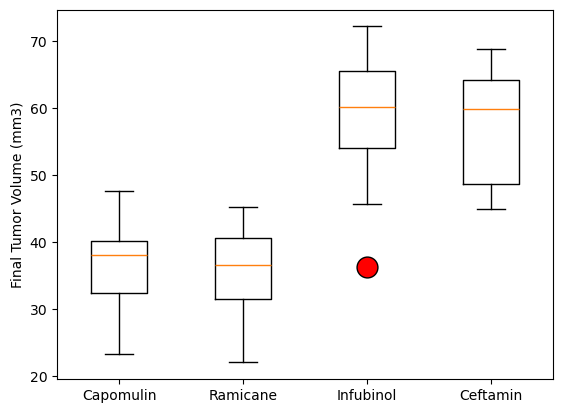

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_group = [Last_Tumor_Volume[Last_Tumor_Volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] for regimen in Four_Regimens]

fig, ax = plt.subplots()
ax.boxplot(tumor_group, labels=Four_Regimens, flierprops = dict(markerfacecolor = 'red', markersize = 15))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show

## Line and Scatter Plots

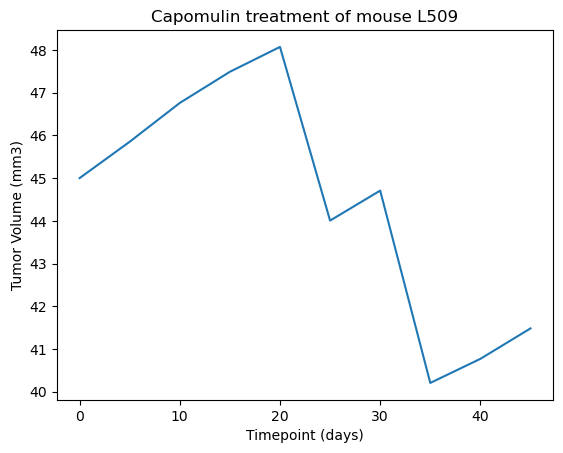

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = Combined_data_results[Combined_data_results['Drug Regimen'] == 'Capomulin']
Selected_mouse = capomulin_mouse[capomulin_mouse['Mouse ID'] == 'l509']
plt.plot(Selected_mouse['Timepoint'], Selected_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse L509')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

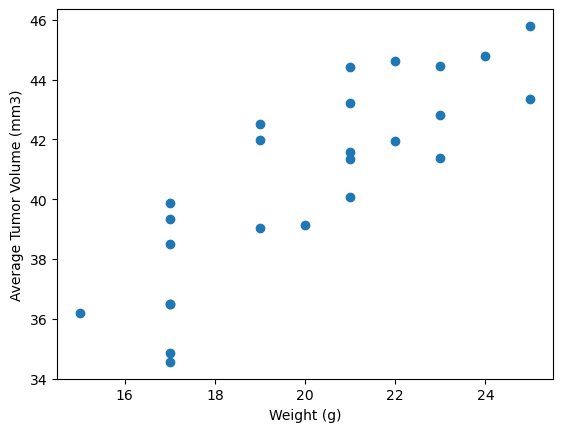

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = Combined_data_results[Combined_data_results['Drug Regimen'] == 'Capomulin']
ave_tumor = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_mice.groupby('Mouse ID')['Weight (g)'].unique().str[0]
plt.scatter(mouse_weight, ave_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


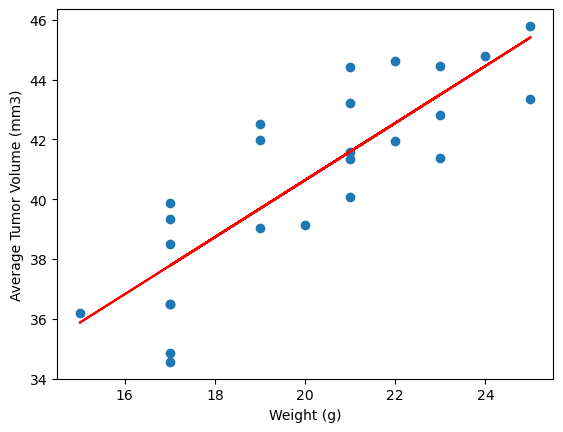

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(ave_tumor, mouse_weight)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, ave_tumor)
regress_values = mouse_weight * slope + intercept

plt.scatter(mouse_weight, ave_tumor)
plt.plot(mouse_weight, regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
